In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("Social_Netwoks_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
X = data.iloc[:, 2:4].values

In [19]:
X.shape

(400, 2)

In [ ]:
y = data.iloc[:, -1].values

In [22]:
y.shape

(400,)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [37]:
X_train.shape

(320, 2)

In [38]:
X_test.shape

(80, 2)

As we are using KNN 2 input colums have very large difference we need to scale it dowm to age's value

we will use class standardscaler inside sklearn.preprocessor

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [ ]:
X_train = scaler.fit_transform(X_train)

In [41]:
X_train

array([[-0.71871786, -1.50965233],
       [-0.14660414, -0.4183596 ],
       [-1.19547929,  0.64343873],
       [ 1.85579387, -1.03774196],
       [-1.76759301,  0.49596674],
       [-1.86294529,  0.52546114],
       [-1.29083158, -0.30038201],
       [ 0.42550958,  2.38360821],
       [ 0.04410043, -0.21189882],
       [-1.00477472, -1.50965233],
       [-0.24195643, -0.30038201],
       [-0.24195643, -0.53633719],
       [-0.71871786,  0.31900035],
       [-0.24195643, -0.3888652 ],
       [ 1.18832787,  0.58444993],
       [-0.71871786,  0.34849475],
       [ 0.23480501, -0.32987641],
       [ 1.37903244, -1.39167474],
       [ 2.14185073, -0.65431479],
       [ 0.04410043, -0.53633719],
       [ 2.14185073, -0.77229238],
       [ 0.13945272,  0.08304516],
       [ 0.04410043,  1.32180988],
       [-0.33730871, -0.74279798],
       [-1.48153615, -0.3888652 ],
       [ 0.23480501,  0.11253956],
       [-0.432661  , -0.5068428 ],
       [-0.24195643, -0.27088761],
       [-1.00477472,

In [ ]:
X_test = scaler.transform(X_test)

In [43]:
X_test

array([[-0.05125185,  0.08304516],
       [ 2.14185073,  0.9973715 ],
       [ 1.47438473,  2.20664182],
       [-0.90942243,  0.55495553],
       [ 0.33015729,  0.34849475],
       [-1.29083158, -0.3888652 ],
       [-0.14660414,  1.67574266],
       [ 1.47438473,  1.0563603 ],
       [ 1.28368016,  2.29512502],
       [-0.05125185,  0.73192192],
       [-0.432661  , -1.09673076],
       [ 0.04410043, -0.5068428 ],
       [ 2.14185073, -0.77229238],
       [-1.00477472,  0.46647234],
       [ 2.14185073, -1.00824756],
       [-0.52801329,  1.52827067],
       [-0.71871786,  1.97068664],
       [ 0.23480501, -0.62482039],
       [ 0.80691872, -0.80178678],
       [-0.432661  , -1.18521395],
       [-1.100127  , -1.56864113],
       [ 0.42550958,  0.05355077],
       [ 0.90227101,  1.32180988],
       [-1.29083158, -1.33268594],
       [-0.24195643,  0.20102276],
       [ 0.90227101,  1.0858547 ],
       [-0.71871786, -0.56583159],
       [-1.00477472, -0.30038201],
       [-1.48153615,

Applying KNN algo : 

 We need to find K by applying square root 

In [44]:
np.sqrt(X_train.shape[0])

17.88854381999832

In [ ]:
k = 17

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)

In [ ]:
# for training our model

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [ ]:
y_pred = knn.predict(X_test)

In [51]:
y_pred.shape

(80,)

In [ ]:
# need to check y_test shape to ensure both are same
y_test.shape

(80,)

In [ ]:
# to verify Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


0.9125

In [ ]:
# to verify confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


array([[44,  5],
       [ 2, 29]])

Let's try 2nd method which is trail and error method


In [ ]:
error_train = []
error_test = []

for i in range(1, 29):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    x = confusion_matrix(y_train, knn.predict(X_train))
    y = confusion_matrix(y_test, knn.predict(X_test))
    error_train.append((x[0][1] + x[1][0]) / x.sum())
    error_test.append((y[0][1] + y[1][0]) / y.sum())

In [56]:
error_train

[0.003125,
 0.078125,
 0.06875,
 0.071875,
 0.078125,
 0.084375,
 0.071875,
 0.084375,
 0.0875,
 0.103125,
 0.09375,
 0.096875,
 0.090625,
 0.09375,
 0.09375,
 0.096875,
 0.090625,
 0.0875,
 0.090625,
 0.090625,
 0.096875,
 0.096875,
 0.090625,
 0.096875,
 0.090625,
 0.09375,
 0.090625,
 0.09375]

In [57]:
len(error_train)

28

In [58]:
len(error_test)

28

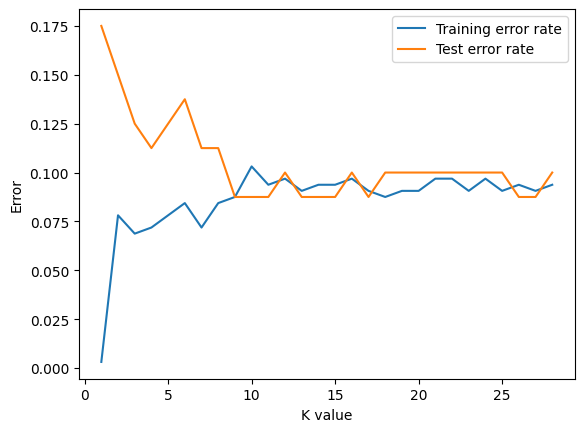

In [ ]:
plt.plot(range(1, 29), error_train, label="Training error rate")
plt.plot(range(1, 29), error_test, label="Test error rate")
plt.xlabel("K value")
plt.ylabel("Error")
plt.legend()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9125

Creating a function for predecting the output


In [ ]:
def predict_output():
    age = int(input("Enter your age : "))
    salary = int(input("Enter your salary : "))

    X_new = np.array([[age], [salary]]).reshape(1, 2)
    X_new = scaler.transform(X_new)

    if knn.predict(X_new)[0] == 0:
        return "Item can not be purchased"
    else:
        return "Item can be purchased"

In [93]:
predict_output()

'Item will can not be purchased'

Creating a Meshgrid


In [ ]:
a = np.arange(start=X_train[:, 0].min() - 1, stop=X_train[:, 0].max() + 1, step=0.01)
a.shape

(601,)

In [ ]:
b = np.arange(start=X_train[:, 1].min() - 1, stop=X_train[:, 1].max() + 1, step=0.01)
b.shape

(599,)

In [ ]:
XX, YY = np.meshgrid(a, b)

In [ ]:
XX.shape

(599, 601)

In [103]:
YY

array([[-2.56864113, -2.56864113, -2.56864113, ..., -2.56864113,
        -2.56864113, -2.56864113],
       [-2.55864113, -2.55864113, -2.55864113, ..., -2.55864113,
        -2.55864113, -2.55864113],
       [-2.54864113, -2.54864113, -2.54864113, ..., -2.54864113,
        -2.54864113, -2.54864113],
       ...,
       [ 3.39135887,  3.39135887,  3.39135887, ...,  3.39135887,
         3.39135887,  3.39135887],
       [ 3.40135887,  3.40135887,  3.40135887, ...,  3.40135887,
         3.40135887,  3.40135887],
       [ 3.41135887,  3.41135887,  3.41135887, ...,  3.41135887,
         3.41135887,  3.41135887]])

classify every point on the meshgrid


Fetching 1st value


In [ ]:
print(XX[0][0])
print(YY[0][0])
knn.predict(np.array([-2.862945294656013, -2.5686411260352955]).reshape(1, 2))

-2.862945294656013
-2.5686411260352955


array([0])

Need to perform for entire data

In [ ]:
# Example of ravel
# m=np.array([[1,2,3],[4,5,6]])
# n=np.array([[7,8,9],[0,0,0]])
# m
# n
# np.array([m.ravel(),n.ravel()]).shape

np.array([XX.ravel(), YY.ravel()]).shape
input_array = np.array([XX.ravel(), YY.ravel()]).T
labels = knn.predict(input_array)


In [121]:
labels.shape

(359999,)

Plotting the array as image



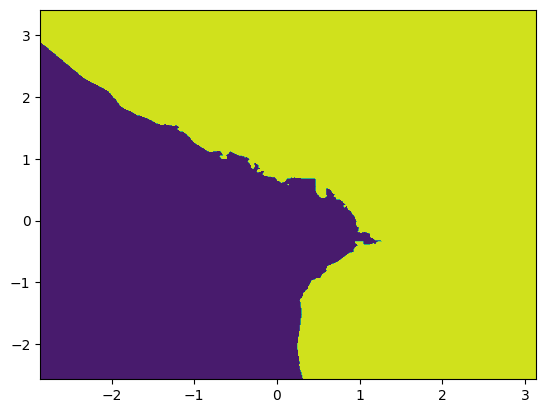

In [ ]:
plt.contourf(XX, YY, labels.reshape(XX.shape))

Plotting all the training data on plot


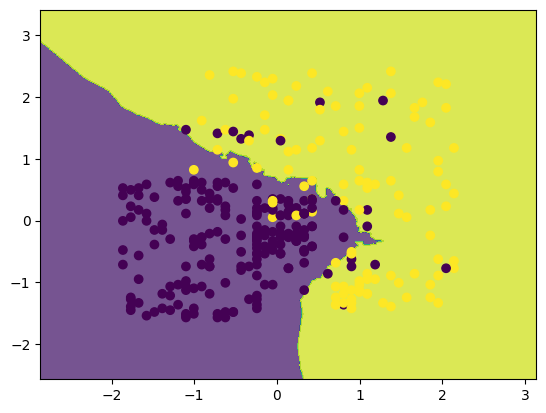

In [ ]:
plt.contourf(XX, YY, labels.reshape(XX.shape), alpha=0.75)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)